In [1]:
# Importing libraries
import pandas as pd
import datetime as dt
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading and reading data file 
Data = pd.read_excel("INF2178_A1_data.xlsx", sheet_name="data")

In [3]:
# Adding Month column 
Data['OCCUPANCY_MONTH'] = Data['OCCUPANCY_DATE'].dt.month

# Converting numerical Month to full name Month
Data['OCCUPANCY_MONTH'] = Data['OCCUPANCY_MONTH'].apply(lambda x: calendar.month_abbr[x])
# Ordering the months
Data['OCCUPANCY_MONTH'] = pd.Categorical(Data['OCCUPANCY_MONTH'],
                             categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                             ordered=True)
# Sorting the data based on months
Data = Data.sort_values(["OCCUPANCY_MONTH"], ignore_index=True)

In [4]:
# Defining a function for Program Occupancy Rate
def Program_OccupancyRate_Function(row):
    # For bed-based capacity
    if row['CAPACITY_TYPE'] == "Bed Based Capacity":
        rate = row['OCCUPIED_BEDS']/row['CAPACITY_ACTUAL_BED']
    elif row['CAPACITY_TYPE'] == "Room Based Capacity":
        # For room-based capacity
        rate = row['OCCUPIED_ROOMS']/row['CAPACITY_ACTUAL_ROOM']
    return rate

# Applying function for each row
Data['Program_OccupancyRate'] = Data.apply(Program_OccupancyRate_Function, axis=1)

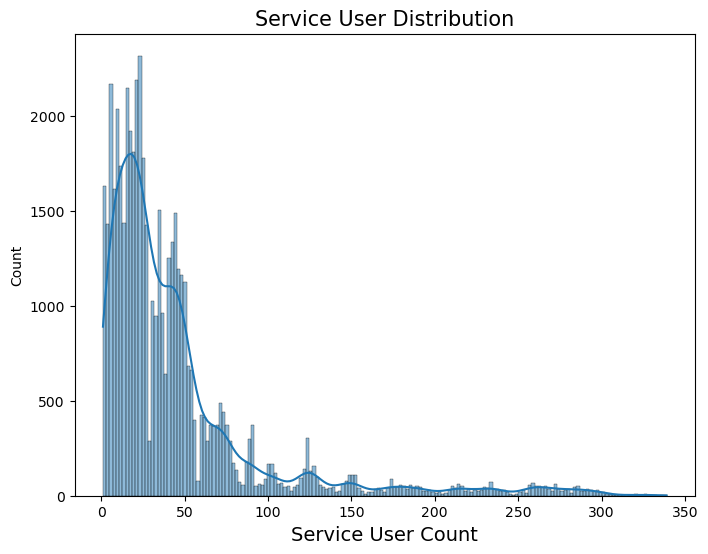

In [5]:
##### Service Count Distribution #####
# Setting plot dimensions
plt.figure(figsize=(8, 6))

# Plotting histogram and adding trend line
sns.histplot(data = Data, x = "SERVICE_USER_COUNT", kde=True)

# Adding title and axis names
plt.xlabel('Service User Count',size = 14) 
plt.title('Service User Distribution', size = 15) 

# Display graph
plt.show()

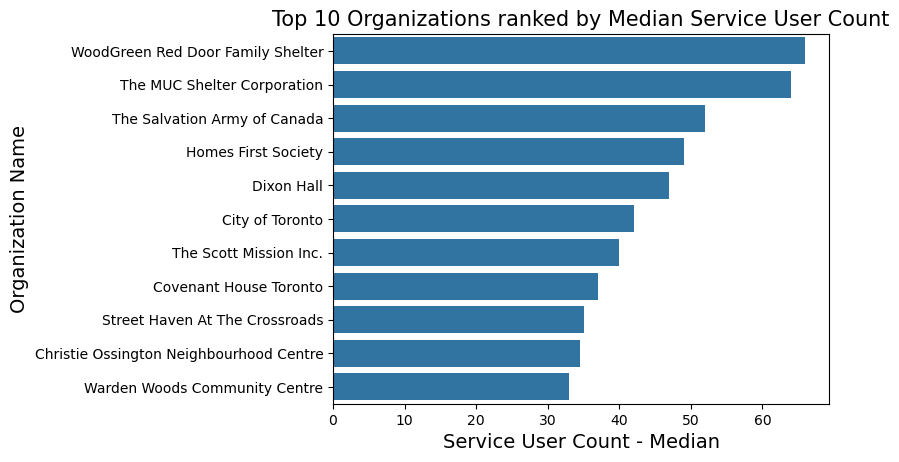

In [6]:
###### Top 10 organizations ###### 

# Calculating median of service user count for each organization
Median_Service_User_Count = Data.sort_values('ORGANIZATION_NAME').groupby("ORGANIZATION_NAME")["SERVICE_USER_COUNT"].median()
# Converting to pandas DF
Median_Service_User_Count_DF = pd.DataFrame(Median_Service_User_Count)
# Adding grouped values as column and resetting index
Median_Service_User_Count_DF = Median_Service_User_Count_DF.reset_index()
# Sorting in descending order by Median value
Median_Service_User_Count_DF = Median_Service_User_Count_DF.sort_values('SERVICE_USER_COUNT', ascending = False)
# Subsetting for top 10 rows (organizations)
Top10_Organizations_DF = Median_Service_User_Count_DF.iloc[0:11]

### Plotting top 10 organizations as horizontal barplot ###

sns.barplot(
    x="SERVICE_USER_COUNT", 
    y="ORGANIZATION_NAME", 
    data=Top10_Organizations_DF
)

# Adding title and axis names
plt.xlabel('Service User Count - Median', size = 14) 
plt.ylabel('Organization Name', size = 14) 
plt.title('Top 10 Organizations ranked by Median Service User Count', size = 15) 

# Display graph
plt.show();

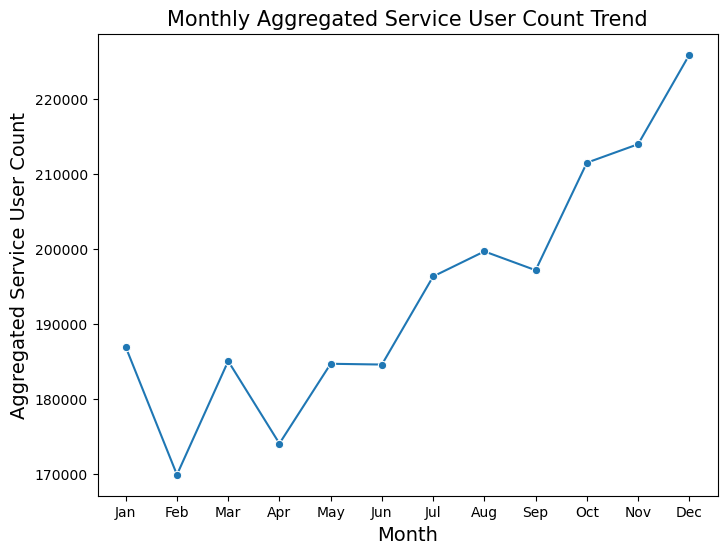

In [7]:
###### Service Count based on Months ###### 

# Calculating sum of service users across each Month
ServiceUser_Month = Data.groupby("OCCUPANCY_MONTH")["SERVICE_USER_COUNT"].sum()
# Convert to pandas DF and resetting index for readability
ServiceUser_Month_DF = pd.DataFrame(ServiceUser_Month)
ServiceUser_Month_DF = ServiceUser_Month_DF.reset_index()

# Setting plot dimensions 
plt.figure(figsize=(8, 6)) 

### Plotting line chart ###

sns.lineplot(x='OCCUPANCY_MONTH',
             y='SERVICE_USER_COUNT',
             data=ServiceUser_Month_DF,
             marker='o', 
             sort = True
           )


# Adding title and axis names
plt.xlabel('Month', size = 14) 
plt.ylabel('Aggregated Service User Count', size = 14) 
plt.title('Monthly Aggregated Service User Count Trend', size = 15) 

# Display graph
plt.show();

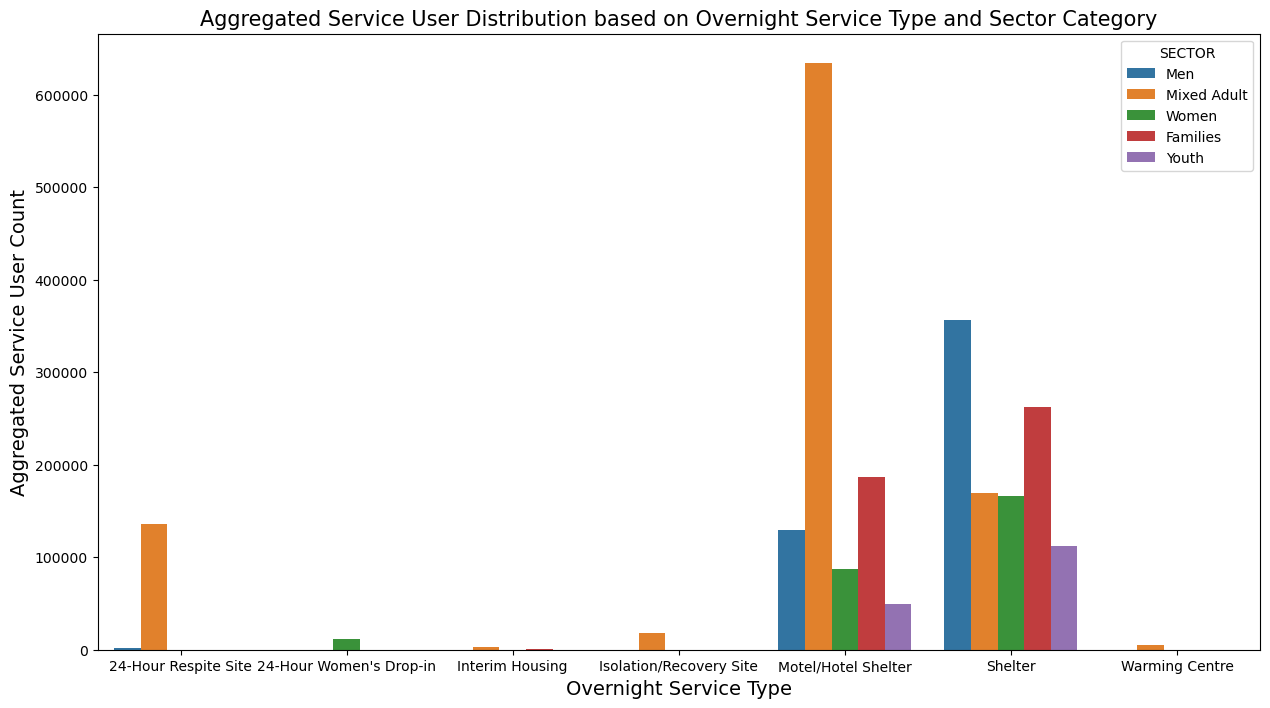

In [8]:
###### Distribution of Service Users based on Overnight Service and Sector ######

# Calculating sum of service users across each Month
ServiceUser_Service_Sector = Data.groupby(["OVERNIGHT_SERVICE_TYPE", "SECTOR"])["SERVICE_USER_COUNT"].sum()
# Convert to pandas DF and resetting index for readability
ServiceUser_Service_Sector_DF = pd.DataFrame(ServiceUser_Service_Sector)
ServiceUser_Service_Sector_DF = ServiceUser_Service_Sector.reset_index()

# Seting plot dimensions
plt.figure(figsize=(15, 8))

# Plotting grouped bar plot
plot = sns.barplot(x="OVERNIGHT_SERVICE_TYPE", y="SERVICE_USER_COUNT", hue="SECTOR", data=ServiceUser_Service_Sector_DF, ci = None)

# Adding title and axis names
plt.xlabel('Overnight Service Type', size = 14) 
plt.ylabel('Aggregated Service User Count', size = 14) 
plt.title('Aggregated Service User Distribution based on Overnight Service Type and Sector Category', size = 15) 

# Display graph
plt.show();


In [9]:
##### Frequency Count for Capacity Type #####
# Grouping by type of capacity to aggregate the service user count 
CapacityType_Count = Data.groupby(['CAPACITY_TYPE'])['SERVICE_USER_COUNT'].sum()
# Convert to pandas DF and resetting index for readability
CapacityType_Count_DF = pd.DataFrame(CapacityType_Count)
# Resetting index
CapacityType_Count_DF = CapacityType_Count_DF.reset_index()
# Print DF
CapacityType_Count_DF


,CAPACITY_TYPE,SERVICE_USER_COUNT
0,Bed Based Capacity,964851
1,Room Based Capacity,1364674


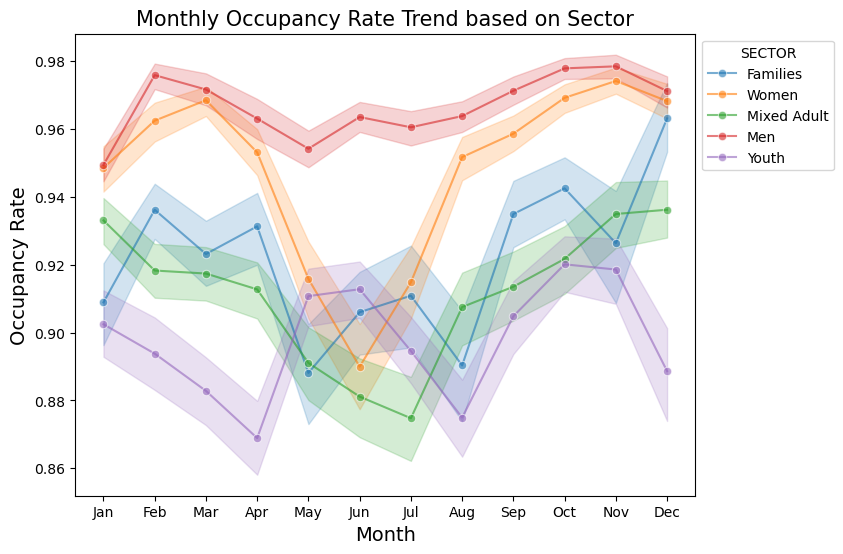

In [10]:
##### Occupancy Rate Trend based on Sector and Month #####

# Setting plot dimensions
plt.figure(figsize=(8, 6))

# Plotting linechart
ax = sns.lineplot(x='OCCUPANCY_MONTH',
             y='Program_OccupancyRate',
             hue='SECTOR', 
             data=Data,
             marker='o', 
             alpha = 0.6, 
             linestyle='-' 
            )

# Adding title and axis names
plt.xlabel('Month', size = 14) 
plt.ylabel('Occupancy Rate', size = 14) 
plt.title('Monthly Occupancy Rate Trend based on Sector', size = 15) 

# Moving legend 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Display graph
plt.show() 

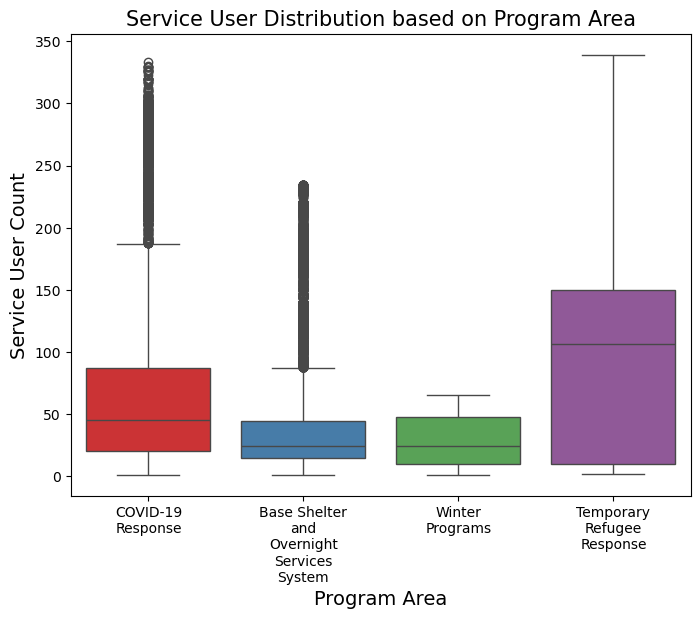

In [11]:
##### Service User Distribution based on Program Area ##### 

# Setting plot dimensions
plt.figure(figsize=(8, 6))

# Plotting boxplot
plot = sns.boxplot( x=Data["PROGRAM_AREA"], y=Data["SERVICE_USER_COUNT"],palette="Set1")

# Wrapping x-axis labels for readability
labels = [textwrap.fill(label.get_text(), 12) for label in plot.get_xticklabels()]
plot.set_xticklabels(labels)

# Adding title and axis names
plt.xlabel('Program Area', size = 14) 
plt.ylabel('Service User Count', size = 14) 
plt.title('Service User Distribution based on Program Area', size = 15)


# Display plot
plt.show();


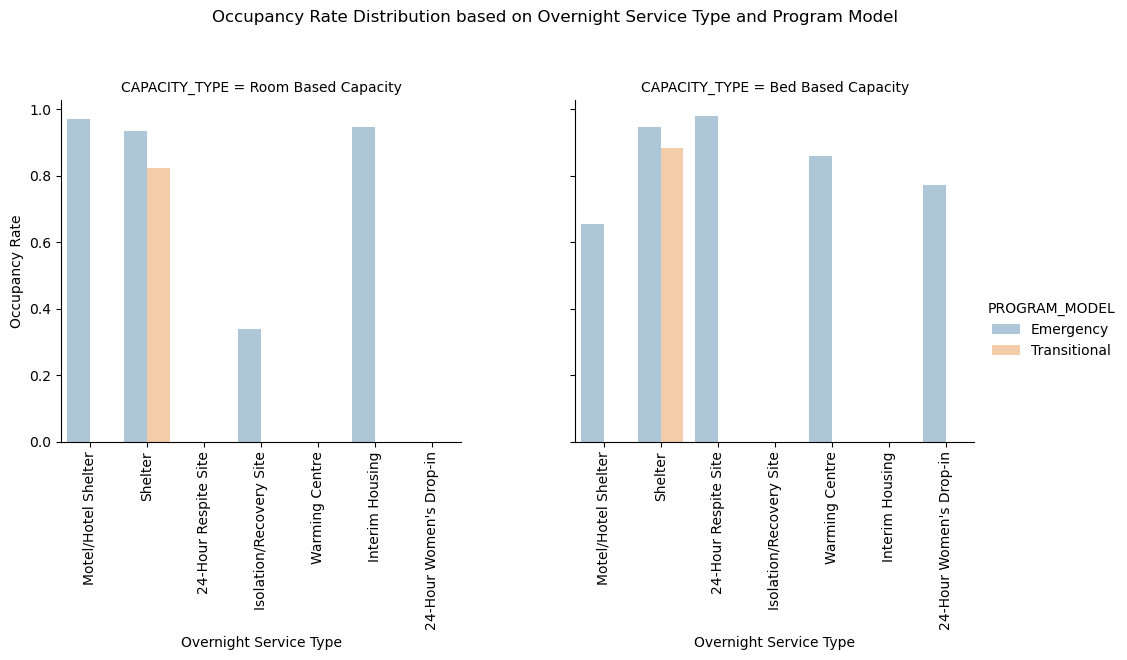

In [12]:
##### Capacity type - occupancy rate distribution across overnight service type #####


plot = sns.catplot(x="OVERNIGHT_SERVICE_TYPE", y="Program_OccupancyRate", alpha = 0.4,
                data=Data, col = "CAPACITY_TYPE", hue = "PROGRAM_MODEL", kind = "bar", ci = None)

# Rotating labels for readability
plot.set_xticklabels(rotation=90)

# Adding title and axis names
plot.set_axis_labels("Overnight Service Type", "Occupancy Rate")
# Adding top buffer
plot.fig.subplots_adjust(top=0.80)
plot.fig.suptitle('Occupancy Rate Distribution based on Overnight Service Type and Program Model')

# Display plot
plt.show();

In [13]:
##### t-tests #####

# Defining Level of significance
level_of_sig = 0.05

### Checking for any significant differences in the mean occupancy rates for program model (pm) ###

## Defining hypothesis - 
# Null hypothesis : There is no significant difference between the mean occupancy rates of the two program models
# Alternative hypothesis : There is a significant difference between the mean occupancy rates of the two program models

# Defining DFs for each level in program model
Emergency_DF = Data['Program_OccupancyRate'][Data['PROGRAM_MODEL'] == 'Emergency']
Transitional_DF = Data['Program_OccupancyRate'][Data['PROGRAM_MODEL'] == 'Transitional']

# Running Welch's t-test (for unequal variances)
t_value_pm,p_value_pm = ttest_ind(Emergency_DF, Transitional_DF, equal_var=False)

# Printing results
print('Program Model - Test statistic :%f'%float("{:.6f}".format(t_value_pm)))
print('Program Model - p-value :%f'%p_value_pm)

# Adding space between the outputs 
print(' ')

# Printing conclusion of t-test
if(p_value_pm < level_of_sig):
    print("Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant difference between the mean occupancy rates of the two program models")
else:
    print("Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove significant difference between the mean occupancy rates of the two program models")   

Program Model - Test statistic :40.981115
Program Model - p-value :0.000000
 
Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant difference between the mean occupancy rates of the two program models


In [14]:
### Checking for any significant differences in the mean occupancy rates of program frequency (pf) ###
# Creating dummy column for program
Data['Program_Freq'] = Data['PROGRAM_AREA']

# Replacing Values in dummy column - categorizing into 'Regular', and 'Temporary' 
Data['Program_Freq'].replace(['Base Shelter and Overnight Services System'], 'Regular', inplace=True)
Data['Program_Freq'].replace(['COVID-19 Response', 'Temporary Refugee Response', 'Winter Programs'], 'Temporary', inplace=True)

## Defining hypothesis - 
# Null hypothesis : There is no significant difference between the mean occupancy rates of the two program freqencies
# Alternative hypothesis : There is a significant difference between the mean occupancy rates of the two program freqencies

# Defining DFs for each level in program frequency
Regular_DF = Data['Program_OccupancyRate'][Data['Program_Freq'] == 'Regular']
Temporary_DF = Data['Program_OccupancyRate'][Data['Program_Freq'] == 'Temporary']

# Defining Level of significance
level_of_sig = 0.05

# Running Welch's t-test (for unequal variances)
t_value_pf,p_value_pf = ttest_ind(Regular_DF, Temporary_DF, equal_var=False)

# Printing results
print('Program Frequency - Test statistic :%f'%float("{:.6f}".format(t_value_pf)))
print('Program Frequency - p-value :%f'%p_value_pf)

# Adding space between the outputs 
print(' ')

# Printing conclusion of t-test
if(p_value_pf < level_of_sig):
    print("Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant difference between the mean occupancy rates of the two program freqencies")
else:
    print("Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove significant difference between the mean occupancy rates of the two program freqencies")   

Program Frequency - Test statistic :-1.946863
Program Frequency - p-value :0.051563
 
Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove significant difference between the mean occupancy rates of the two program freqencies


In [15]:
### Checking for any significant differences in the mean occupancy rates of capacity type (ct) ###

## Defining hypothesis - 
# Null hypothesis : There is no significant difference between the mean occupancy rates of the two types of capacity
# Alternative hypothesis : There is a significant difference between the mean occupancy rates of the two types of capacity

# Defining DFs for each level in program frequency
Bed_Capacity_DF = Data['Program_OccupancyRate'][Data['CAPACITY_TYPE'] == 'Bed Based Capacity']
Room_Capacity_DF = Data['Program_OccupancyRate'][Data['CAPACITY_TYPE'] == 'Room Based Capacity']

# Defining Level of significance
level_of_sig = 0.05

# Running Welch's t-test (for unequal variances)
t_value_ct,p_value_ct = ttest_ind(Bed_Capacity_DF, Room_Capacity_DF, equal_var=False)

# Printing results
print('Capacity Type - Test statistic :%f'%float("{:.6f}".format(t_value_ct)))
print('Capacity Type - p-value :%f'%p_value_ct)

# Adding space between the outputs 
print(' ')

# Printing conclusion of t-test
if(p_value_ct < level_of_sig):
    print("Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant difference between the mean occupancy rates of the two types of capacity")
else:
    print("Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove significant difference between the mean occupancy rates of the two types of capacity")   

Capacity Type - Test statistic :-4.498752
Capacity Type - p-value :0.000007
 
Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant difference between the mean occupancy rates of the two types of capacity
